### Kriss Sitapara - Assignment 1B ###

### Optimization algorithms for linear regression
Task 1: Stochastic Gradient Descent

Gradient of Loss Function (MSE + L2 Regularization):

$$
\nabla_w = \frac{2}{N} X^T (Xw - y) + 2\lambda w
$$


Weight Update Rule:

$$
w = w - \eta \nabla_w
$$


Loss Function (MSE + L2 Regularization):

$$
L(w) = \frac{1}{N} \sum_{i=1}^{N} (Xw - y)^2 + \lambda \|w\|^2
$$


L2 Regularization Term:

$$
\lambda \|w\|^2 = \lambda \sum_{j=1}^{p} w_j^2
$$


Hyperparameters:
- Degree of polynomial: M = 9
- Learning rate: 0.45 
- Lambda: 0.000001
- Number of epochs: 10000


In [1621]:
import torch
import matplotlib.pyplot as plt

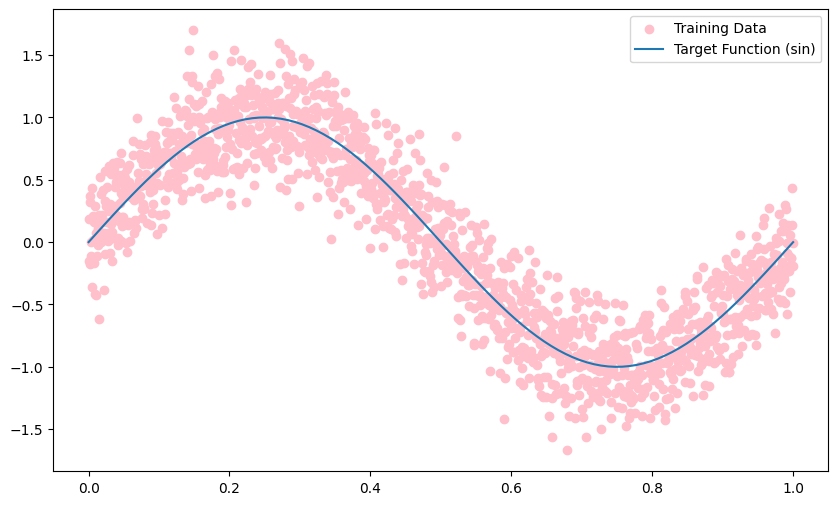

In [1622]:
def sinusoidal(x):
    return torch.sin(2 * torch.pi * x)
def create_toy_data(sample_size, domain=[0, 1], std=0.25):
    x = torch.linspace(domain[0], domain[1], sample_size)
    y = sinusoidal(x) + torch.normal(mean=0, std=std, size=x.shape)
    return x, y

x_train, y_train = create_toy_data(1500, std=0.25)
x_test = torch.linspace(0, 1, 100)
y_test = sinusoidal(x_test)
plt.figure(figsize=[10, 6])
plt.scatter(x_train, y_train, color='pink', label="Training Data")
plt.plot(x_test, y_test, label="Target Function (sin)")
plt.legend()
plt.show()

In [1623]:
def polynomial_features(x, degree):
    return torch.stack([x**i for i in range(degree + 1)], dim=1)

In [1624]:
# hyperparameters
degree = 9
lamda = 0.000001
learning_rate = 0.45
epochs = 10000 

X_train_poly = polynomial_features(x_train, degree)
X_test_poly = polynomial_features(x_test, degree)
weights = torch.randn(degree + 1, requires_grad=True)

In [1625]:
def compute_loss(X, y, weights, lamda):
    y_pred = X @ weights
    mse_loss = torch.mean((y_pred - y) ** 2)
    l2_reg = lamda * torch.sum(weights ** 2)  
    return mse_loss + l2_reg


In [1626]:
losses = []
optimizer = torch.optim.SGD([weights], lr=learning_rate)

for epoch in range(epochs):
    optimizer.zero_grad()
    loss = compute_loss(X_train_poly, y_train, weights, lamda)
    loss.backward()
    optimizer.step()
    torch.nn.utils.clip_grad_norm_([weights], max_norm=1.0)

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")
    losses.append(loss.item()) 

y_pred_ridge = X_test_poly @ weights.detach()

Epoch 0, Loss: 1.2864940166473389
Epoch 1000, Loss: 0.11231981217861176
Epoch 2000, Loss: 0.10255992412567139
Epoch 3000, Loss: 0.09503297507762909
Epoch 4000, Loss: 0.08908209949731827
Epoch 5000, Loss: 0.08437566459178925
Epoch 6000, Loss: 0.08065330982208252
Epoch 7000, Loss: 0.07770926505327225
Epoch 8000, Loss: 0.07538069039583206
Epoch 9000, Loss: 0.07353882491588593


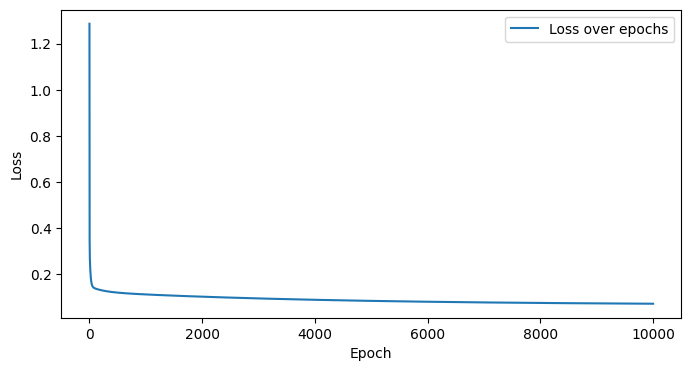

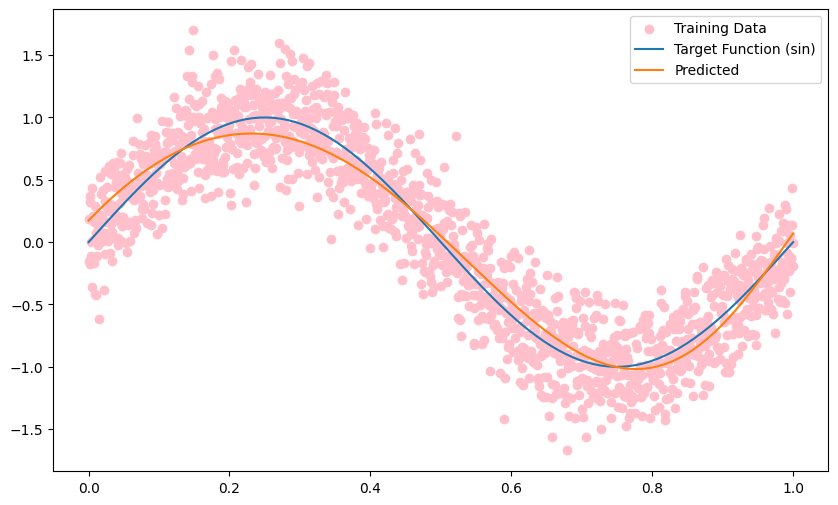

In [1627]:
#final plots
plt.figure(figsize=[8, 4])
plt.plot(losses, label="Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=[10, 6])
plt.scatter(x_train, y_train, color='pink', label="Training Data")
plt.plot(x_test, y_test, label="Target Function (sin)")
plt.plot(x_test, y_pred_ridge, label="Predicted")
plt.legend()
plt.show()